![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [56]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [57]:
columns2 = []
for col in data.columns:
    columns2.append(re.sub(" ","_", col).lower())
data.columns = columns2

In [58]:
categorical_df = data.select_dtypes(object)

In [59]:
categorical_df_num = categorical_df.drop(columns =['customer','state','education','employmentstatus','location_code','policy_type','sales_channel','vehicle_class','marital_status'])
categorical_df_rest = categorical_df[['state','education','employmentstatus','location_code','policy_type','sales_channel','vehicle_class','marital_status']]

2. Plot all the categorical variables with the proper plot. What can you see?


In [60]:
sns.set(rc={'figure.figsize':(13,5)})

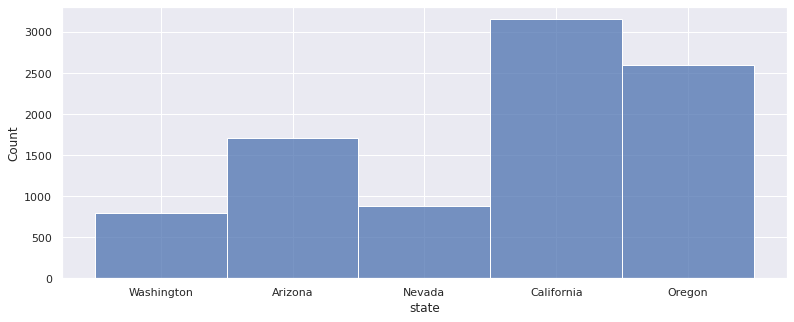

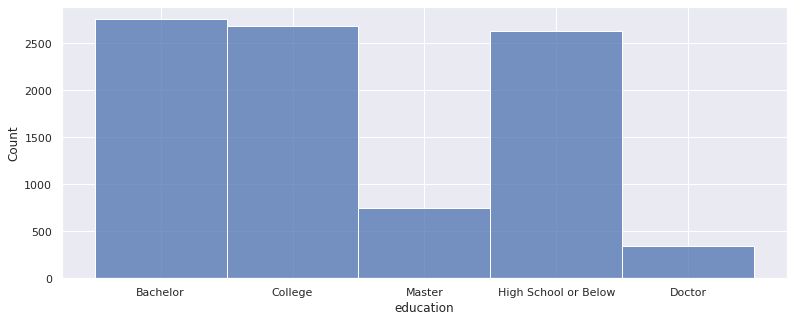

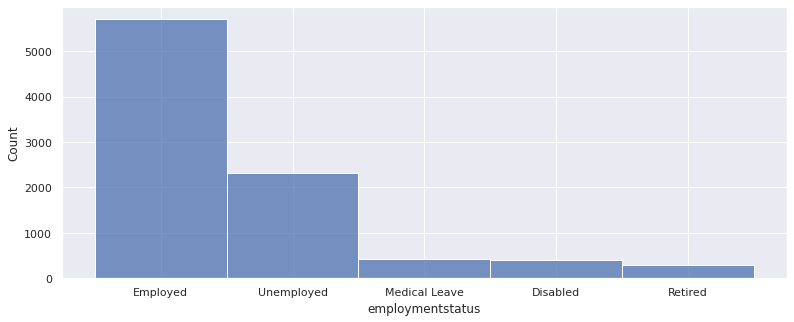

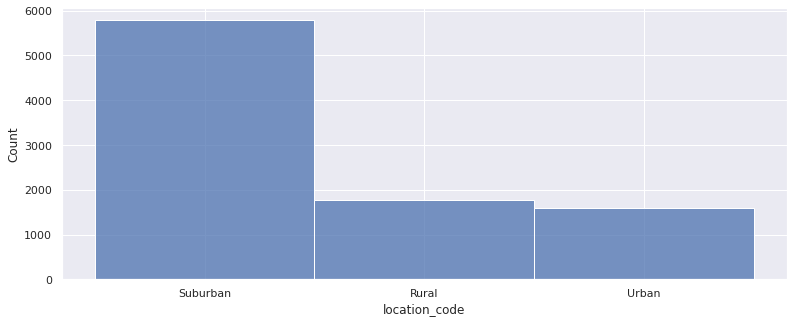

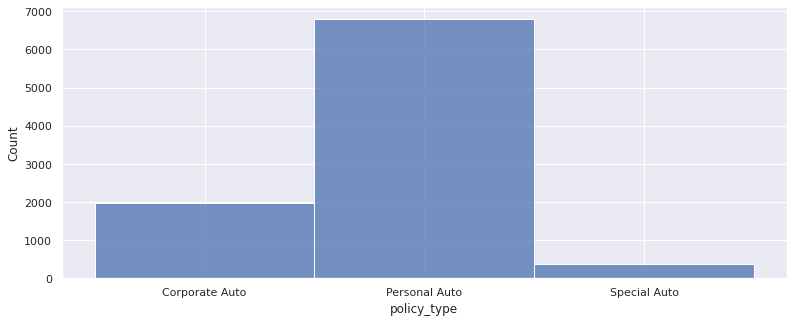

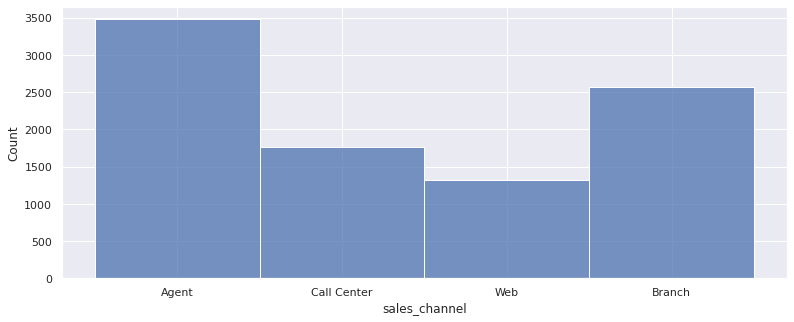

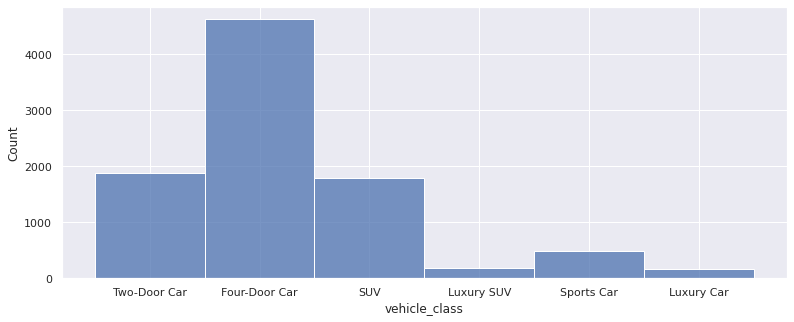

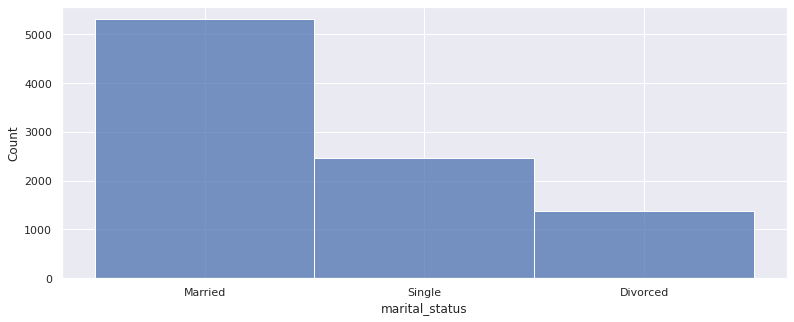

In [61]:
for col in categorical_df_rest.columns:
    sns.histplot(categorical_df_rest[col])
    plt.show()

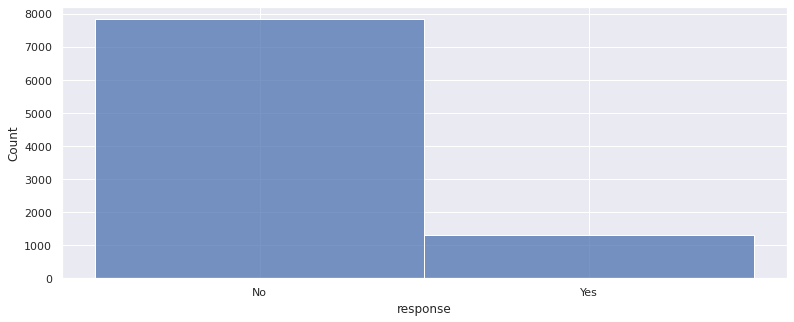

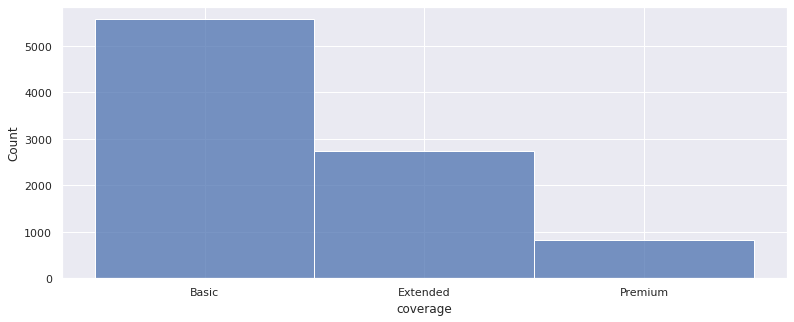

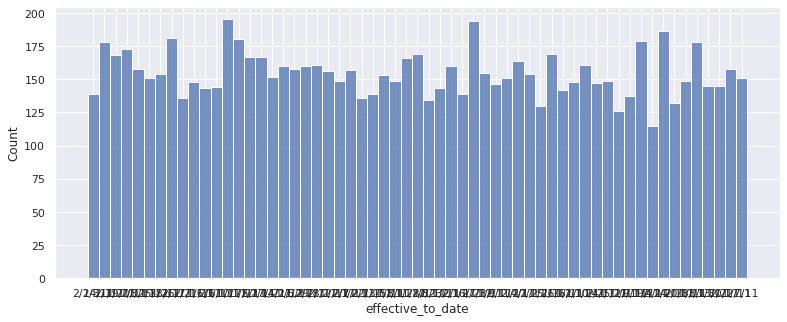

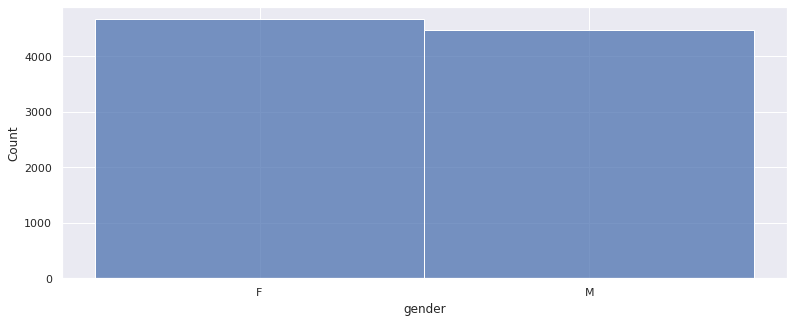

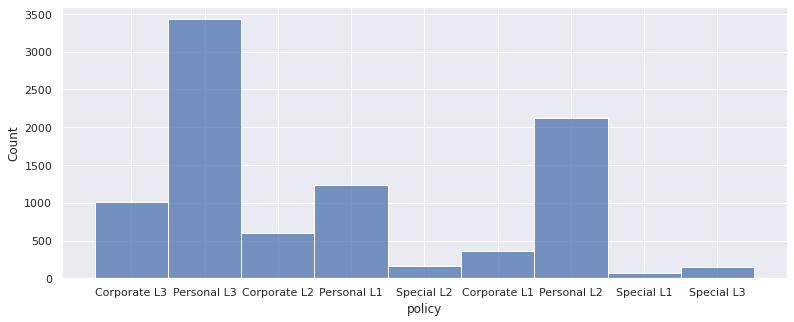

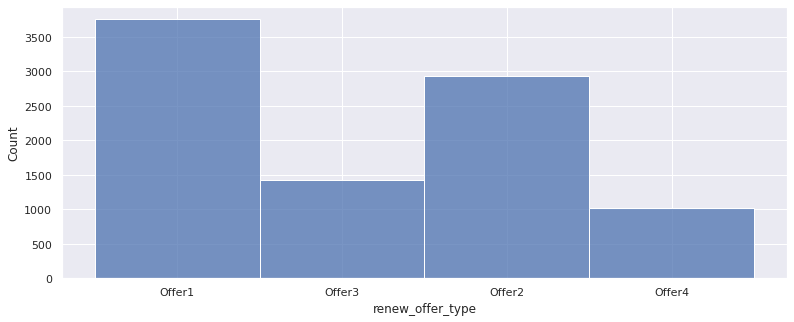

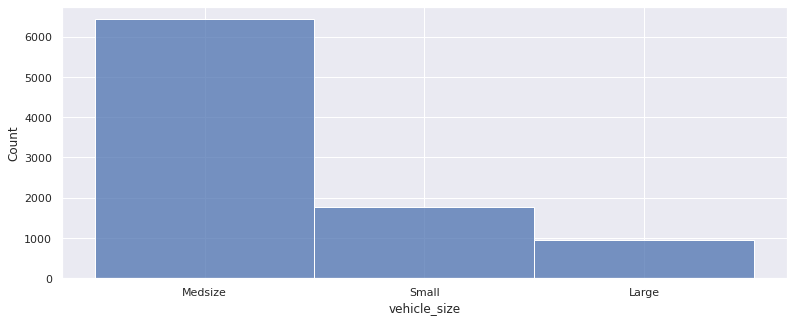

In [62]:
for col in categorical_df_num.columns:
    sns.histplot(categorical_df_num[col])
    plt.show()

In [63]:
# I see that effective to date is not categorical. Policy and Policy type are redundant

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?


In [64]:
# Policy and Policy type are redundant we can drop one column or we can separate 2 coumns, one for 
# special/pèrsonal/corporate and the other one for L1/2/3

4. Plot time variable. Can you extract something from it?

In [72]:
categorical_df2 = categorical_df.copy()
categorical_df2['effective_to_date'] = categorical_df2['effective_to_date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
categorical_df2 = categorical_df2.sort_values(by="effective_to_date")

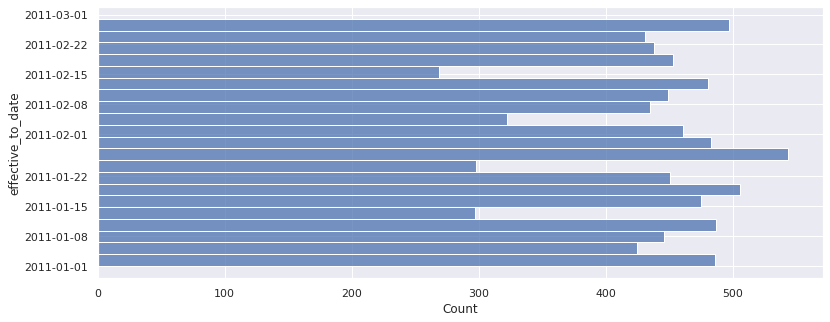

In [77]:
ax = sns.histplot(y = categorical_df2['effective_to_date'])

In [ ]:
# 2 times per month the etd decreases considerably